In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
plt.style.use('seaborn-whitegrid')

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_14937/2236703401.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
x = np.genfromtxt('archive/Train.csv', dtype=[int, 'U19', int], delimiter=',', skip_header=1)
print(x)

[(    0, '25-08-2012 00:00',   8) (    1, '25-08-2012 01:00',   2)
 (    2, '25-08-2012 02:00',   6) ... (18285, '25-09-2014 21:00', 702)
 (18286, '25-09-2014 22:00', 580) (18287, '25-09-2014 23:00', 534)]


In [3]:
#a
print('Primul esantion: ', x[0][1])
print('Al doilea esantion: ', x[1][1])

print('Frecventa de esantionare este 1/3600')
fs = 1/3600

Primul esantion:  25-08-2012 00:00
Al doilea esantion:  25-08-2012 01:00
Frecventa de esantionare este 1/3600


In [4]:
#b
print('Semnalul a fost esantionat pe', len(x) / 24 , 'zile')

Semnalul a fost esantionat pe 762.0 zile


In [5]:
#c
'''
fs/2 = 1/7200
'''

'\nfs/2 = 1/7200\n'

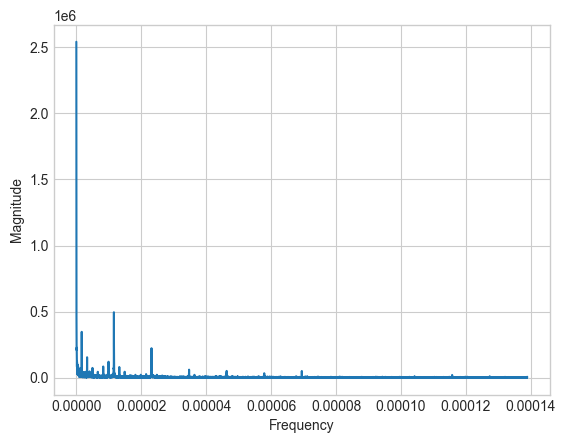

In [6]:
#d
no_cars = np.array([a[2] for a in x])

N: int = len(no_cars)

X = np.fft.fft(no_cars)[:N//2]

X = np.abs(X)

X = X[:N//2]

f = fs * np.linspace(0, N//2, N//2) / N

plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.plot(f, X)
plt.show()

In [7]:
#e

epsilon: float = 0.000001
mean_sin = np.mean(np.sin(2 * np.pi * np.linspace(0, 1, 1000)))

print('Mean of sinusoidal function: ', 0 if mean_sin < epsilon else mean_sin)

mean_signal = np.mean(no_cars)

print('Mean of registered signal: ', 0 if np.abs(mean_signal) < epsilon else mean_signal)

'''
Because the mean ≠ 0, the signal is has a continuous component
'''

print('Mean of signal after "Mean removal"/ "DC offset removal": ', 0 if np.abs(np.mean(no_cars - mean_signal)) < epsilon else np.mean(no_cars - mean_signal))

Mean of sinusoidal function:  0
Mean of registered signal:  138.95811461067368
Mean of signal after "Mean removal"/ "DC offset removal":  0


Frecventele sunt:  [0.0, 1.5190734866989925e-08, 3.038146973397985e-08, 1.1575339968646325e-05]


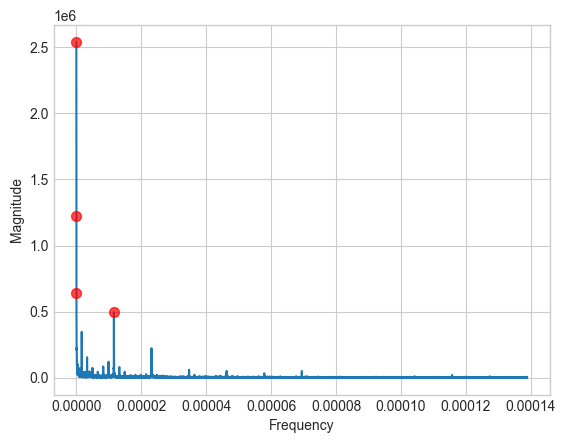

In [34]:
#f

X_copy = np.copy(X)
fr = []
for _ in range(4):
    i = np.argmax(X_copy)
    X_copy[i] = -1
    fr.append(i)

print("Frecventele sunt: ", [f[x] for x in fr])

plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.plot(f, X, label='Original Fourier Spectrum', zorder=1)

# Highlight the top 4 frequencies with scatter points
for i in range(4):
    plt.scatter(f[fr[i]], X[fr[i]], color='red', marker='o', s=50, alpha=0.7, label=f'Top {i+1} Frequency', zorder=2)


plt.show()

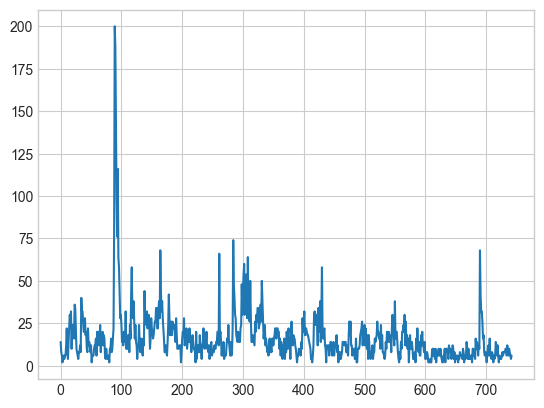

In [36]:
#g

#1584 -> 2327 (you can look inside test.csv, i think it's faster)

plt.plot(no_cars[1584:2327])
plt.show()

In [38]:
#h
'''
Prima metoda care mi a venit in cap este sa facem sample pe un an de zile si sa vedem cum putem corela datele.

De asemenea  presupun ca se pot face niste asumptii sociologice, de pilda oamenii tind sa nu iasa din casa in perioada sarbatorilor de iarna.

Exista o periodicitate a semnalului, astfel iti poti da seama cand s-a terminat un an.

Aplici diferite filtre pentru a obtine un semnal cat mai smooth pentru a usura procesul de precizare.
'''

'\nPrima metoda care mi a venit in cap este sa facem sample pe un an de zile si sa vedem cum putem corela datele.\n\nDe asemenea  presupun ca se pot face niste asumptii sociologice, de pilda oamenii tind sa nu iasa din casa in perioada sarbatorilor de iarna.\n\nExista o periodicitate a semnalului, astfel iti poti da seama cand s-a terminat un an.\n\nAplici diferite filtre pentru a obtine un semnal cat mai smooth pentru a usura procesul de precizare.\n'

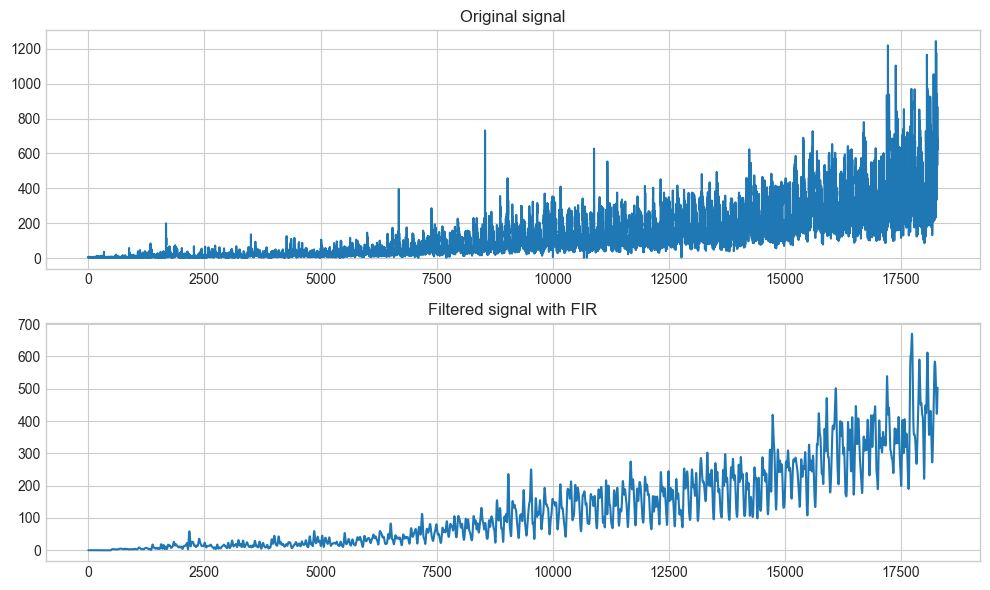

In [48]:
#i
from scipy.signal import firwin, lfilter

cutoff = 0.05
no_coef: int = 1000

coef_filter = firwin(no_coef, cutoff)

filtered_signal = lfilter(coef_filter, 1.0, no_cars)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(no_cars, label='Original signal')
plt.title('Original signal')

plt.subplot(2, 1, 2)
plt.plot(filtered_signal, label='Filtered signal')
plt.title('Filtered signal with FIR')

plt.tight_layout()
plt.show()